<h1>AIRCRAFT RISK ANALYSIS</h1>
<h2>Project Overview</h2>
For this project, I will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.
The project aims to determine which aircrafts are the lowest risk, for the company to start their business venture.

<h2>Business Problem</h2>
The company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavour. I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

<h2>Data Source</h2>
This is a dataset from the National Safety Board from 1962-2023 about civil aviation accidents and selected incidents in the United States and International Waters.

In [2]:
#Loading necessary libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing te specific dataset
df = pd.read_csv('AviationData.csv', encoding='windows-1252')

<h2>Understanding the Data</h2>


In [5]:
#Checking for the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
#Checking the columns and rows
df.shape

(88889, 31)

In [7]:
#Understanding the data structure before conducting further analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

<h2>DATA CLEANING USING PANDAS</h2>

This involves checking for missing values, replacing data in specific columns, dropping or adding columns and/or rows, renaming columns and/or rows.

This essentially means fixing the improper data to reduce risk of errors.

In [10]:
#Checking for missing data values per column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [11]:
#Dropping the columns that will not be of use during the analysis
cols_to_drop = ['Latitude', 'Longitude', 'Schedule','Air.carrier', 'FAR.Description','Registration.Number',
                'Airport.Name', 'Airport.Code', 'Injury.Severity','Accident.Number', 'Investigation.Type',
               'Number.of.Engines', 'Report.Status', 'Publication.Date','Amateur.Built']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [12]:
#Gives null values columnwise
df.isna().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Country                     226
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [13]:
# Impute numerical data
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)

In [14]:
# Fill missing values for categorical columns
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
df['Weather.Condition'].fillna('Unknown', inplace=True)   
df['Engine.Type'].fillna('Unknown', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Purpose.of.flight'].fillna('Unknown', inplace=True)

In [15]:
#Renaming the Unknown columns of the Weather condition column with one name
df['Weather.Condition']= df['Weather.Condition'].replace('Unknown','UNK')
df['Weather.Condition']= df['Weather.Condition'].replace('Unk','UNK')

In [16]:
#Renaming the Unknown columns of the Aircraft Category column with one name
df['Aircraft.Category']= df['Aircraft.Category'].replace('Unknown','UNK')


In [17]:
#Filling the missing values in the Make column
df['Make'].fillna(df['Make'].mode()[0], inplace=True)

In [18]:
#Filling missing values in the Model column
df['Model'] = df.groupby('Make')['Model'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown')

In [19]:
# Convert all entries in 'Make' column to lowercase
df['Make'] = df['Make'].str.title()


In [20]:
#Confirming if all the missing data is cleaned
df.isna().sum()

Event.Id                  0
Event.Date                0
Location                  0
Country                   0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88889 non-null  object 
 3   Country                 88889 non-null  object 
 4   Aircraft.damage         88889 non-null  object 
 5   Aircraft.Category       88889 non-null  object 
 6   Make                    88889 non-null  object 
 7   Model                   88889 non-null  object 
 8   Engine.Type             88889 non-null  object 
 9   Purpose.of.flight       88889 non-null  object 
 10  Total.Fatal.Injuries    88889 non-null  float64
 11  Total.Serious.Injuries  88889 non-null  float64
 12  Total.Minor.Injuries    88889 non-null  float64
 13  Total.Uninjured         88889 non-null  float64
 14  Weather.Condition       88889 non-null

In [22]:
df.shape

(88889, 16)

<h2>According to the summary statistics:</h2>

The average number of injured persons per airplane is 6.

The average number of uninjured persons per airplane is 1.

In [24]:
#Gives Summary Statistics of numerical data
df.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889.000000,88889.000000,88889.000000,88889.000000
mean,0.564761,0.240491,0.309127,4.971245
std,5.126649,1.434614,2.083715,27.002011
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


In [25]:
# Save the cleaned dataset
df.to_csv('Cleaned_AviationData.csv')

<h1>DATA ANALYSIS</h1>
<h2>Based on the business problem, here are the key questions we aim to answer:</h2>

1.**Aircraft Safety**: Which aircraft makes and models are associated with the least accidents?

2.**Flight Phases**: During which phases of flight (e.g., takeoff, landing) do most accidents occur?

3.**Weather Conditions**: How does weather influence accident severity?

4.**Geographic Insights**: Are there high-risk locations or countries for aviation incidents?

5.**Engine Type**: Are specific airplane engine types or counts linked to higher accident rates?

6.**Trend Analysis Overtime**: How have aviation accidents evolved from 1962 to 2023?


<h2>Risk Identification by Aircraft Models</h2>

<h3>1.Fatal Injuries By Model</h3>

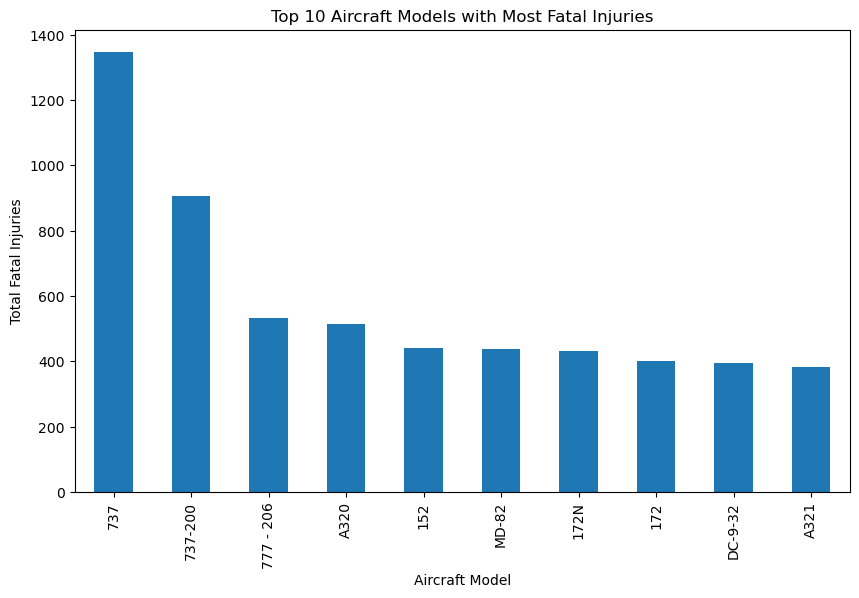

In [29]:
fatalities_by_model = df.groupby('Model')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
ax = fatalities_by_model.plot(kind='bar', figsize=(10, 6), title='Top 10 Aircraft Models with Most Fatal Injuries')


ax.set_xlabel('Aircraft Model')
ax.set_ylabel('Total Fatal Injuries')
plt.show()

  


<h3>2.Low Risk Models with Few Fatal Injuries</h3>

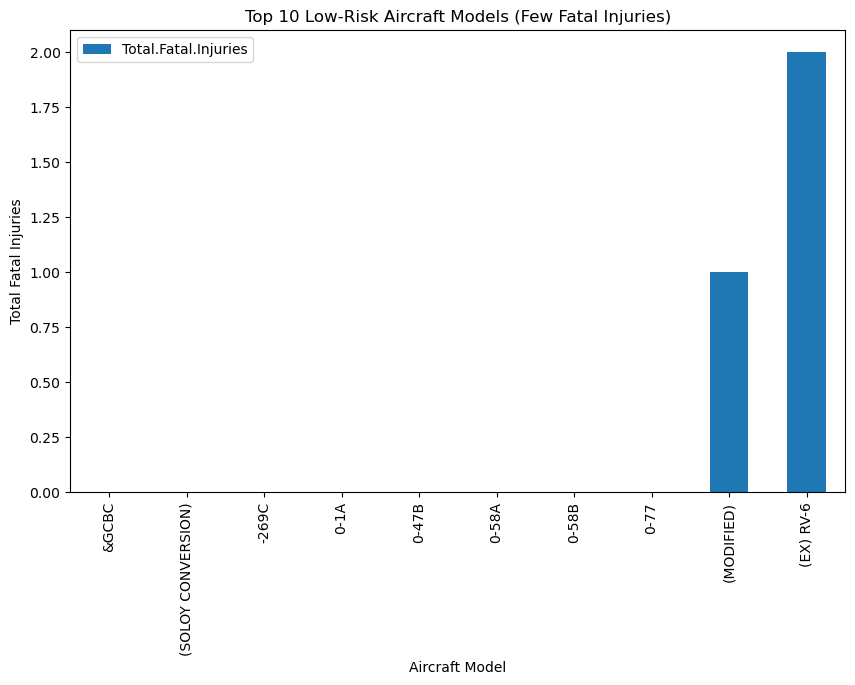

In [31]:
#Grouping and filtering models with less than 10 fatal injuries
low_risk_models = df.groupby('Model').agg({'Total.Fatal.Injuries': 'sum'})
low_risk_models= low_risk_models[low_risk_models['Total.Fatal.Injuries'] <= 5].head(10).sort_values(by='Total.Fatal.Injuries',ascending=True)

#Plotting the graph
low_risk_models.plot(kind='bar', figsize=(10, 6), title='Top 10 Low-Risk Aircraft Models (Few Fatal Injuries)')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Fatal Injuries')
plt.show()


<h2>Risk Identification By Makes</h2>

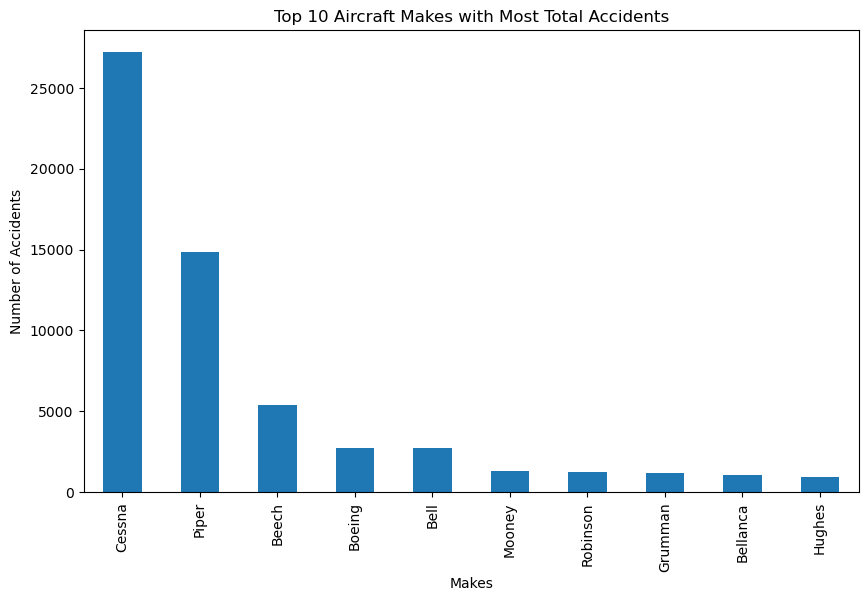

In [33]:


model_types = df['Make'].value_counts().head(10)

#Plotting the bar chart
ax= model_types.plot(kind='bar', figsize=(10, 6),title='Top 10 Aircraft Makes with Most Total Accidents')
model5_types=model_types.sort_values(ascending=True)
ax.set_xlabel('Makes')
ax.set_ylabel('Number of Accidents')
plt.show()
                 

<h2>Risk Identification by Purpose of Flight</h2>

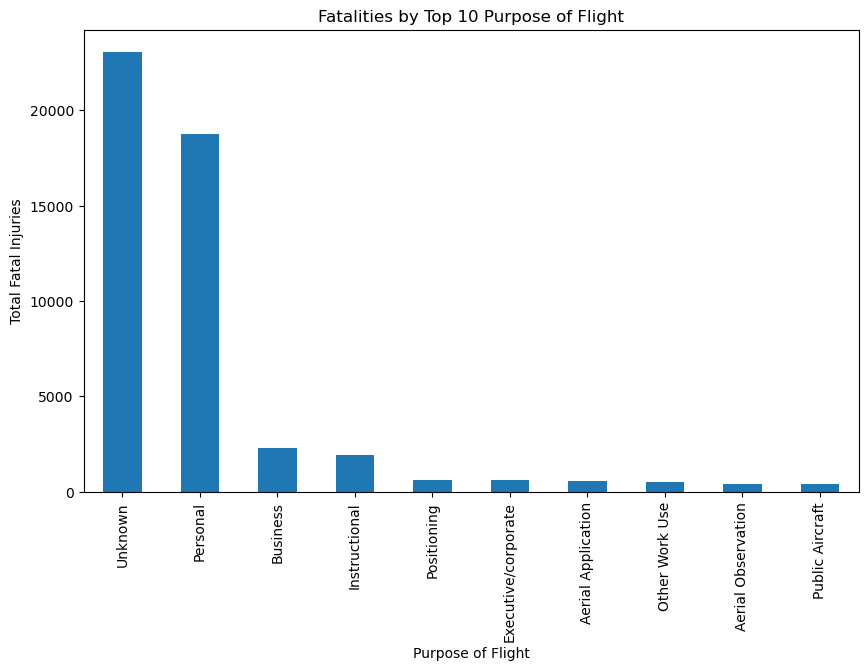

In [35]:
purpose_risk = df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)

#Plotting
purpose_risk.plot(kind='bar', figsize=(10, 6), title='Fatalities by Top 10 Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Fatal Injuries')
plt.show()


<h2>Flight Phases Influencing Accidents</h2>

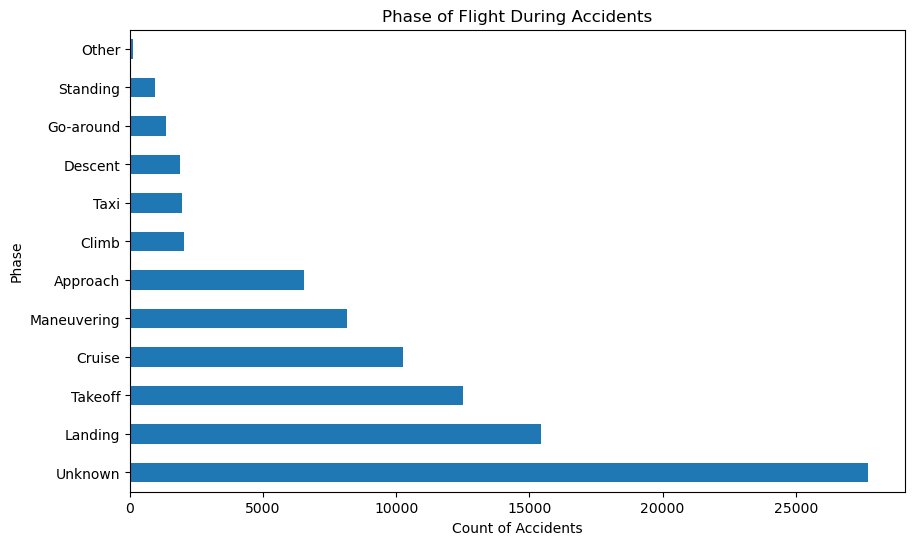

In [37]:

flight_phases = df['Broad.phase.of.flight'].value_counts()

#Plotting the bar chart
ax= flight_phases.plot(kind='barh', figsize=(10, 6),title='Phase of Flight During Accidents')
ax.set_xlabel('Count of Accidents')
ax.set_ylabel('Phase')
plt.show()

<h2>Weather Conditions Influencing Accidents</h2>

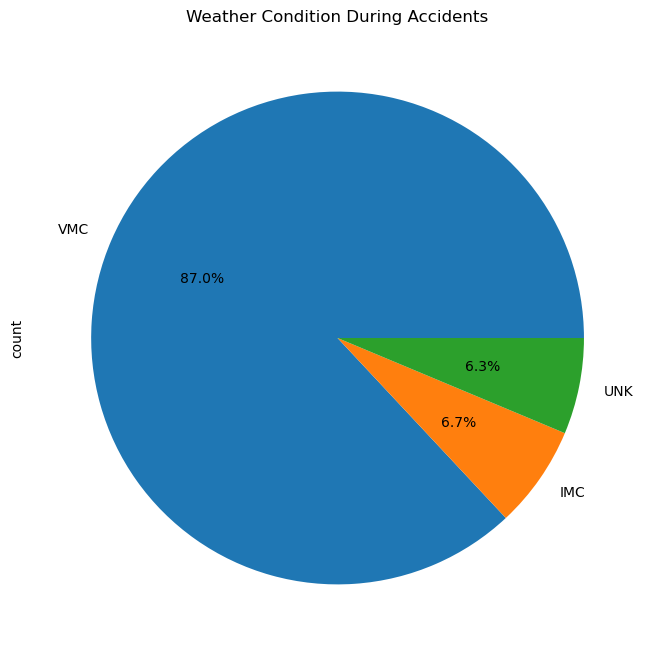

In [39]:
weather_conditions = df['Weather.Condition'].value_counts()

#Plotting a piechart
weather_conditions.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%',title='Weather Condition During Accidents')
ax.set_ylabel('')
plt.show()

<h2>Risk Identification by Geographic Locations</h2>

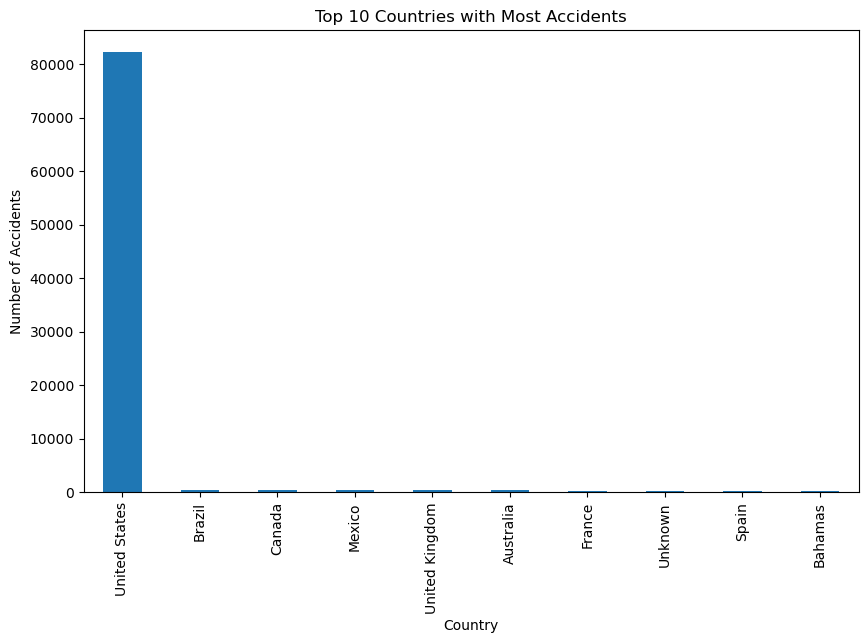

In [41]:

accidents_by_country = df['Country'].value_counts().head(10)

#plotting the bar graph
ax = accidents_by_country.plot(kind='bar', figsize=(10, 6),title='Top 10 Countries with Most Accidents')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Accidents')
plt.show()

<h2>Risk Identification By Engine Types</h2>

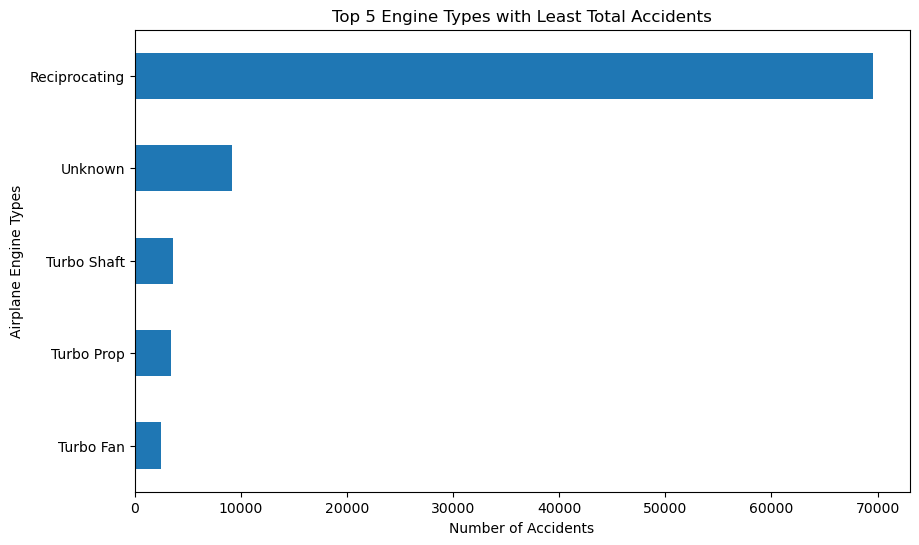

In [43]:
#Grouping by engine type and calculating the average
avg_grouped=df.groupby('Engine.Type')['Event.Id'].size()

#Top 5 engine types
top_5_types=avg_grouped.sort_values(ascending=True).tail(5)

#Plotting the barchart
ax= top_5_types.plot(kind='barh', figsize=(10,6))

ax.set_title('Top 5 Engine Types with Least Total Accidents')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Airplane Engine Types')


plt.show()

<h2>Accidents Over Time</h2>

In [45]:
#Converting the datatype of the column from string to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [46]:
#Extracting year from the datetime to use it for next analysis
df['Year'] = df['Event.Date'].dt.year

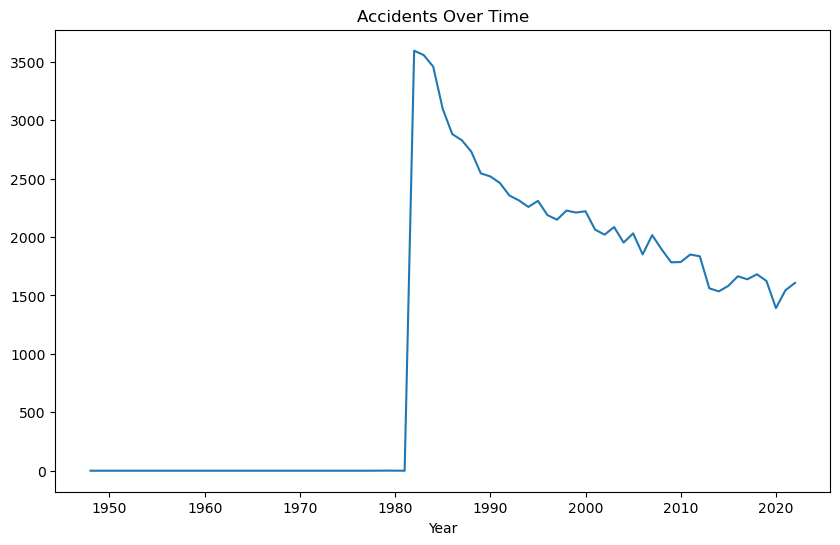

In [47]:
accidents_by_year = df['Year'].value_counts().sort_index()

#Plotting the Line graph
accidents_by_year.plot(kind='line', figsize=(10, 6), title='Accidents Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')
plt.show()

<h1>CONCLUSION</h1>

The analysis of aviation accident data from 1962 to 2023 revealed the key insights about the safety of different airplane makes, engine types and models.

Based on the findings:
1.  Aircraft models &GCBC, -269C and (SOLOY CONVERSION) among others are associated with the lowest risks(less than 5 fatalities in recorded incidents).

2. High-risk geographic locations such as USA should be avoided unless adequate precautions are taken.

3. Turbo Jet airplane Engine types have a strong safety record and should be prioritized.

4. Personal or private purposes of flights are associated with higher risks of fatal injuries compared to business.

